<div>
    <h1 style="text-align:center;"> <b>RFM Analizi</b> ile <br>Müşteri Segmentasyonu </h1>
</div>

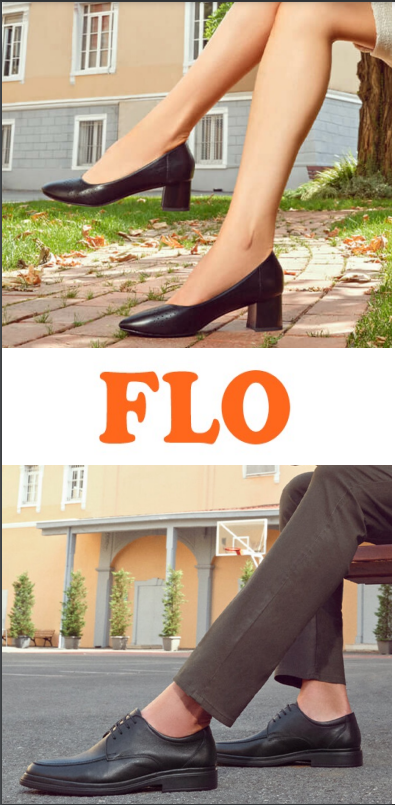


   <h1> İş Problemi</h1>
    <hr>
    <h3 style="text-align:center;" fontsize:35>Online ayakkabı mağazası olan FLO müşterilerini
segmentlere ayırıp bu segmentlere göre pazarlama
stratejileri belirlemek istiyor. Buna yönelik olarak
müşterilerin davranışları tanımlanacak ve bu
davranışlardaki öbeklenmelere göre gruplar oluşturulacak.</h3>

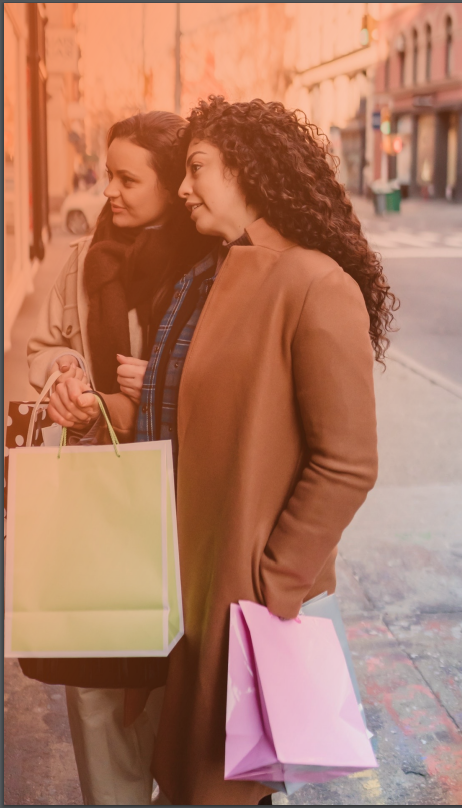

<div>
    <h1> Veri Seti Hikayesi</h1>
    <hr>
     <h3 style="text-align:center;" fontsize:35>Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan)
olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır. </h3>
</div>


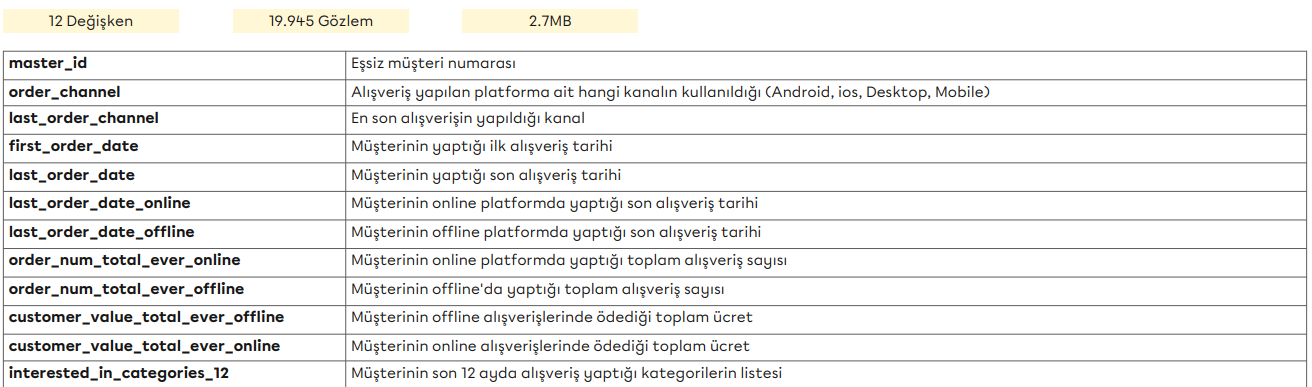


<h1> Proje Görevleri</h1>
    <hr>
    <h3> Görev 1: Veriyi Anlama ve Hazırlama </h3>
    <p> Projede kullanılacak olan kütüphaneleri çalışmamıza aktaralım </p>

In [1]:
# !pip install squarify

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
import squarify

colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

- Adım1: flo_data_20k.csv verisini okuyunuz. Dataframe'in kopyasını oluşturunuz.
- Adım2: Veri setinde
    - İlk 10 gözlem,
    - Değişken isimleri,
    - Betimsel istatistik,
    - Boş değer,
    - Değişken tipleri, incelemesi yapınız.

In [3]:
df_ = pd.read_csv("C:/Users/Acer/Desktop/DS-Bootcamp-main/crm/flo_data_20k.csv")
df = df_.copy()

In [4]:
def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(dataframe.isnull().sum())

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())


check_df(df)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(19945, 12)
**********************************************************************
******************************* Types ********************************
**********************************************************************
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
********

#### Veri Seti İle İlgili Aldığım Notlar
1. Tarih değişkenleri object olarak tanımlanmış. Tarih tipine değiştirilmesi gerekir.
2. Veri setinde boş gözlem yok.
3. Sipariş sayısında aykırı değerler var ancak bir skorlama işlemi yapılacağı için bir baskılama işlemine gerek yok.
4. Online alışveriş sayısı daha fazla
5. Ödenen toplam ücretlerde de bir aykırılık var. Ayrıca ortalama değer ve std arasındaki fark sağa doğru bir çarpıklık olduğunu gösteriyor.
6. En son alışveriş yapılan kanal ile alışveriş kanalı arasında eşsiz değer farkı var?
      - order_channel değişkeni sanırım müşterilerin üye olurken kullandığı kanal?
7. Tüm müşteriler en az 1'er kere hem online hemde offline alışveriş yapmış
8. Veri seti gruplanmış. Bu yüzden müşterilerin hangi aylarda/yıllarda/günlerde daha çok alışveriş yaptığını inceleyemiyorum. Ne yapılabilir? Örneğin yılları gruplayarak ilk alışveriş yılı üzerinden satın alınan toplam ürün ve maliyeti incelenebilir.

- __Adım 3__: Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam
alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [5]:
df["new_total_expenditure"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df["new_total_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

- __Adım 4__: Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [6]:
date_vars = df.columns[df.columns.str.contains("date")]
for col in date_vars:
    df[col] = pd.to_datetime(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

- __Adım 5__: Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.

####################################################################################################
Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: order_channel, dtype: int64


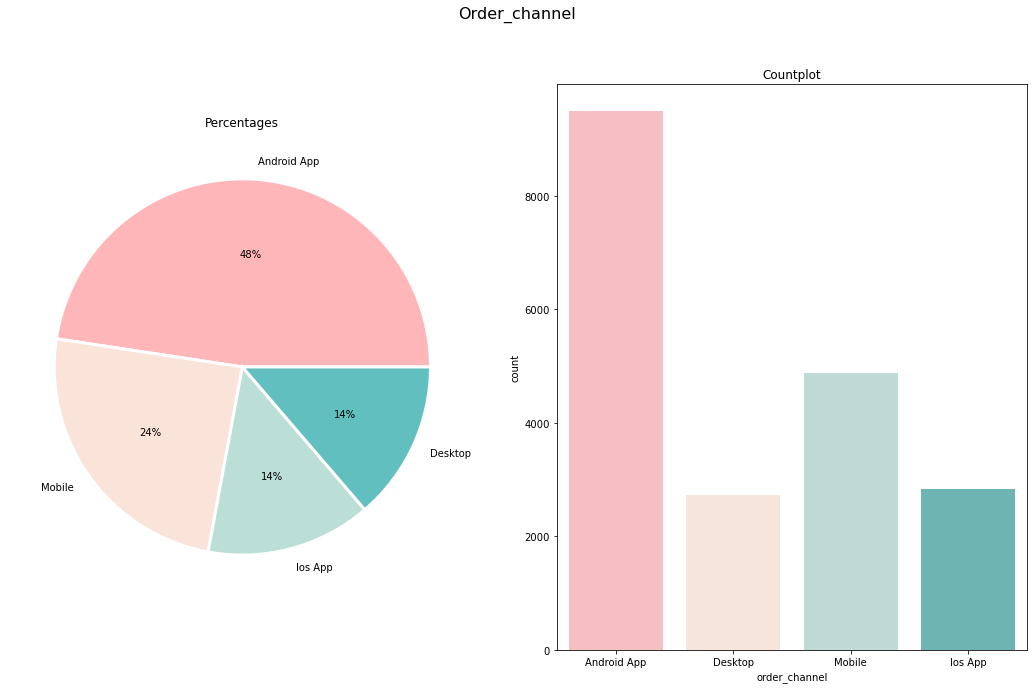

In [7]:
def cat_plots(dataframe, cat_col):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())

    plt.figure(figsize=(15, 10))
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 2, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    plt.subplot(1, 2, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=3)
    plt.show(block=True)

cat_plots(df, "order_channel")

######################################################################
                count        mean          std    min        1%        5%      10%      50%       90%       95%        99%       max
order_channel                                                                                                                       
Android App    9495.0  823.492655   974.764418  55.98  120.9406  189.9700  240.868  601.940  1587.146  2114.015  3774.3788  45905.10
Desktop        2735.0  588.782984   636.342300  44.98  110.8634  161.4070  200.964  447.950  1055.678  1369.761  2722.6188  18443.57
Ios App        2833.0  891.634285  1200.294744  69.98  117.9400  210.4660  265.978  642.480  1653.202  2292.428  4499.4120  33918.10
Mobile         4882.0  620.275125   558.159747  44.98   99.9800  156.9935  200.720  469.305  1176.019  1558.663  2663.0472  12726.10
######################################################################


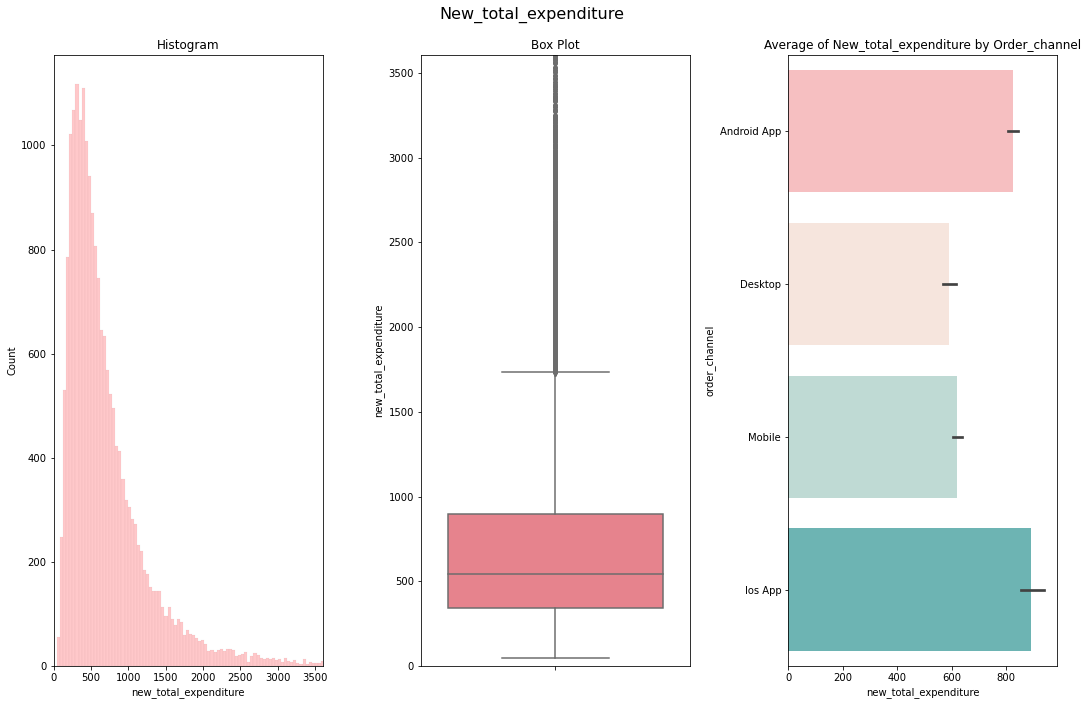

######################################################################
                count      mean       std  min   1%   5%  10%  50%   90%   95%    99%    max
order_channel                                                                               
Android App    9495.0  5.504897  5.245134  2.0  2.0  2.0  2.0  4.0  10.0  13.0  24.00  202.0
Desktop        2735.0  3.992687  3.206719  2.0  2.0  2.0  2.0  3.0   7.0   9.0  16.00   70.0
Ios App        2833.0  5.418637  5.246047  2.0  2.0  2.0  2.0  4.0   9.0  13.0  25.68   83.0
Mobile         4882.0  4.440598  3.897669  2.0  2.0  2.0  2.0  3.0   8.0  11.0  20.00   77.0
######################################################################


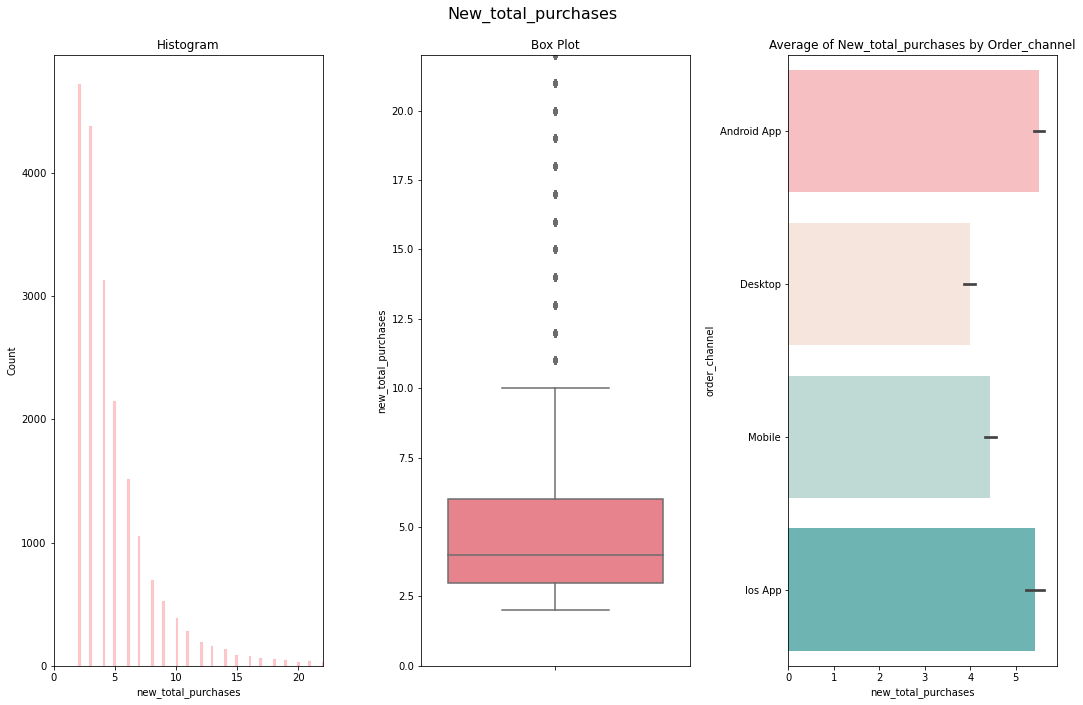

In [8]:
def num_summary(dataframe, col_name, target):
    quantiles = [.01, .05, .1, .5, .9, .95, .99]
    print("#" * 70)
    print(dataframe.groupby(target)[col_name].describe(percentiles=quantiles))
    print("#" * 70)
    xlim = dataframe[col_name].describe(quantiles).T["99%"]

    plt.figure(figsize=(15, 10))
    plt.suptitle(col_name.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Histogram")
    sns.histplot(dataframe[col_name], color="#FFB6B9")
    plt.xlim(0, xlim)

    plt.subplot(1, 3, 2)
    plt.title("Box Plot")
    sns.boxplot(data=dataframe, y=col_name, color="#F67280")
    plt.ylim(0, xlim)

    plt.subplot(1, 3, 3)
    sns.barplot(data=dataframe, x=col_name, y=target, palette=colors, estimator=np.mean)
    plt.title(f"Average of {col_name.capitalize()} by {target.capitalize()}")
    plt.tight_layout(pad=1.5)
    plt.show(block=True)

for col in df.columns[df.columns.str.contains("new")]:
    num_summary(df, col, "order_channel")

- __Adım 6__: En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.
- __Adım 7__: En fazla sipariş veren ilk 10 müşteriyi sıralayınız.

In [9]:
df[["master_id", "new_total_expenditure", "new_total_purchases"]].sort_values("new_total_expenditure", ascending=False).head(10)

,master_id,new_total_expenditure,new_total_purchases
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10,202.0
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29,68.0
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10,82.0
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41,11.0
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34,4.0
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57,70.0
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57,70.0
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10,37.0
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24,131.0
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.15,20.0


In [10]:
df[["master_id", "new_total_expenditure", "new_total_purchases"]].sort_values("new_total_purchases", ascending=False).head(10)

,master_id,new_total_expenditure,new_total_purchases
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10,202.0
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24,131.0
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,10383.44,111.0
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,8572.23,88.0
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,4240.36,83.0
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10,82.0
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,5184.05,77.0
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,5297.88,75.0
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57,70.0
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57,70.0


####################################################################################################
2019    10352
2020     4412
2018     1630
2017     1160
2016      662
2015      614
2021      581
2014      405
2013      129
Name: first_order_year, dtype: int64


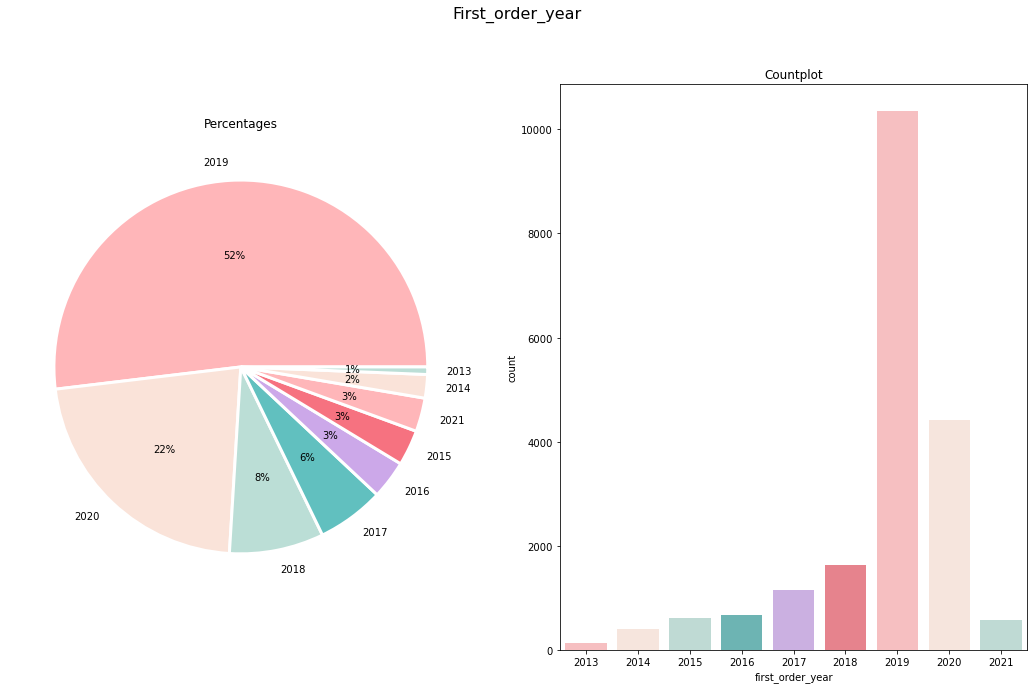

In [11]:
df["first_order_year"] = df["first_order_date"].dt.year
df["first_order_month"] = df["first_order_date"].dt.month_name()
df["first_order_day"] = df["first_order_date"].dt.day_name()
cat_plots(df, "first_order_year")
# 2019'da olan sıçrama ilgi çekici.

####################################################################################################
March        2108
November     2053
February     2038
October      1828
July         1745
September    1715
December     1606
April        1596
August       1525
January      1398
May          1233
June         1100
Name: first_order_month, dtype: int64


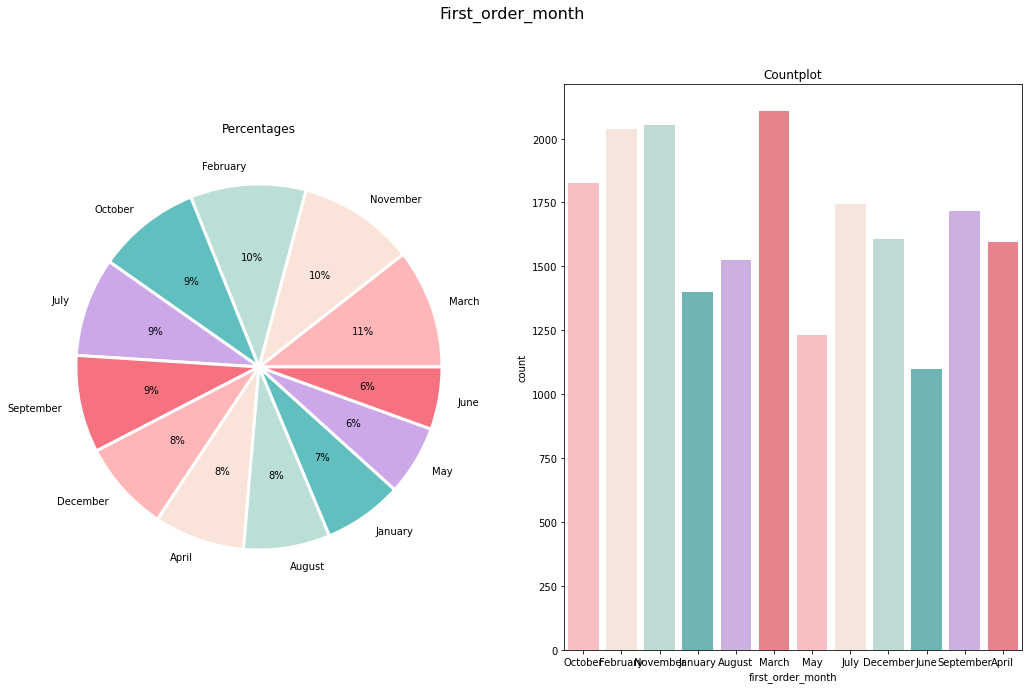

In [12]:
cat_plots(df, "first_order_month")

####################################################################################################
Saturday     3387
Sunday       3386
Monday       2680
Thursday     2655
Wednesday    2632
Friday       2631
Tuesday      2574
Name: first_order_day, dtype: int64


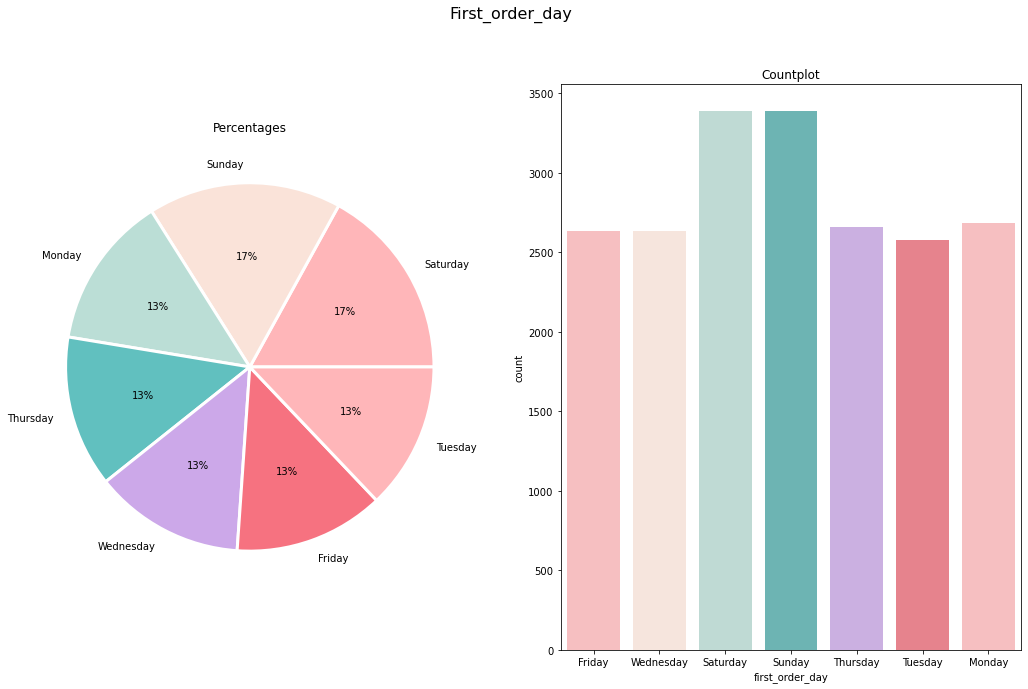

In [13]:
cat_plots(df, "first_order_day")

- __Adım 8__ : Veri ön hazırlık sürecini fonksiyonlaştırınız.

In [14]:
def preprocess(path):
    df_ = pd.read_csv(path)
    df = df_.copy()
    df["new_total_expenditure"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
    df["new_total_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
    date_vars = df.columns[df.columns.str.contains("date")]
    for col in date_vars:
        df[col] = pd.to_datetime(df[col])
    return df

df = preprocess("C:/Users/Acer/Desktop/DS-Bootcamp-main/crm/flo_data_20k.csv")
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,new_total_expenditure,new_total_purchases
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],939.37,5.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.55,21.0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",585.32,5.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",121.97,2.0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],209.98,2.0


# __Görev 2__: RFM Metriklerinin Hesaplanması 
- Recency: Müşteri en son ne zaman alışveriş yaptı?
- Frequency: Müşterinin satın alma sıklığı/ toplam satın alma sayısı
- Monetary: Müşterinin toplam harcadığı para

In [15]:
def rfm_table(dataframe):
    max_date = (dataframe["last_order_date"].max() + dt.timedelta(days=2))
    rfm = pd.DataFrame({
        "Recency": (max_date - dataframe["last_order_date"]),
        "Frequency": dataframe["new_total_purchases"],
        "Monetary": dataframe["new_total_expenditure"]
    })
    rfm["Recency"] = rfm["Recency"].apply(lambda x: x.days)
    return rfm

rfm = rfm_table(df)
rfm.head()

,Recency,Frequency,Monetary
0,95,5.0,939.37
1,105,21.0,2013.55
2,186,5.0,585.32
3,135,2.0,121.97
4,86,2.0,209.98


# __Görev 3__: RF Skorunun Hesaplanması

In [16]:
rfm["Recency_Score"] = pd.qcut(rfm["Recency"], q=5, labels=[5, 4, 3, 2, 1])
rfm["Frequency_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])
rfm["Monetary_Score"] = pd.qcut(rfm["Monetary"], q=5, labels=[1, 2, 3, 4, 5])
rfm["RF_Score"] = rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str)

rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score
0,95,5.0,939.37,3,4,4,34
1,105,21.0,2013.55,3,5,5,35
2,186,5.0,585.32,2,4,3,24
3,135,2.0,121.97,3,1,1,31
4,86,2.0,209.98,3,1,1,31


# Görev 4: RF Skorunun Segment Olarak Tanımlanması

In [17]:
seg_map = {
    r"[1-2][1-2]": "hibernating",
    r"[1-2][3-4]": "at_Risk",
    r"[1-2]5": "cant_loose",
    r"3[1-2]": "about_to_sleep",
    r"33": "need_attention",
    r"[3-4][4-5]": "loyal_customers",
    r"41": "promising",
    r"51": "new_customers",
    r"[4-5][2-3]": "potential_loyalists",
    r"5[4-5]": "champions"
}
rfm["Segment"] = rfm["RF_Score"].replace(seg_map, regex=True)

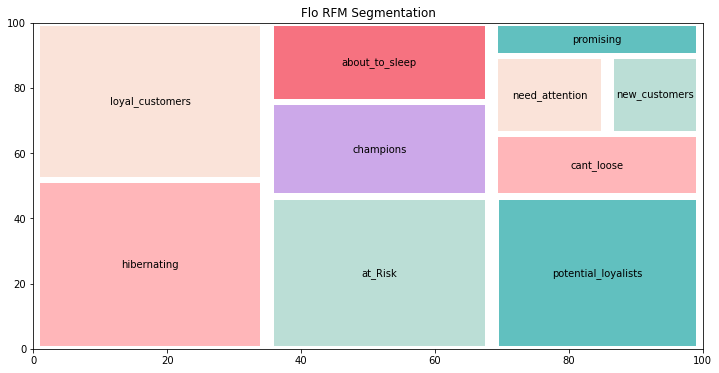

In [18]:
plt.figure(figsize=(12, 6))
plt.title("Flo RFM Segmentation")
squarify.plot(rfm["Segment"].value_counts(),
             label=rfm["Segment"].value_counts().keys(),
             color=colors,
             pad=1,
             text_kwargs={'fontsize': 10})
plt.show()
# https://www.geeksforgeeks.org/treemaps-in-python-using-squarify/

# Görev 5: Aksiyon Zamanı!
- __Adım 1__: Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.

In [ ]:
rfm.groupby("Segment").agg({"Recency": ["mean", "count"],
                           "Frequency": ["mean", "count"],
                           "Monetary": ["mean", "count"]})

In [ ]:
rfm_cols = ["Recency", "Frequency", "Monetary"]
for col in rfm_cols:
    num_summary(rfm, col, "Segment")

- __Adım 2__: RFM analizi yardımıyla aşağıda verilen 2 case için ilgili profildeki müşterileri bulun ve müşteri id'lerini csv olarak kaydediniz.
    1. FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri
        tercihlerinin üstünde. Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak
        iletişime geçmek isteniliyor. Sadık müşterilerinden(champions, loyal_customers) ve kadın kategorisinden alışveriş
        yapan kişiler özel olarak iletişim kurulacak müşteriler. Bu müşterilerin id numaralarını csv dosyasına kaydediniz.

In [ ]:
case1 = df.loc[(rfm["Segment"]=="loyal_customers") | (rfm["Segment"]=="champions"),]
case1_index, case1_ids = zip( * [[row[0], row[1]] for row in case1.reset_index().to_numpy() if "KADIN" in row[-3]])
# https://stackoverflow.com/questions/10479319/possible-to-return-two-lists-from-a-list-comprehension

# case1_index[0:5] , case1_ids[0:5]
case1 = rfm.loc[case1_index, ]
case1["master_id"] = case1_ids
case1 = case1[case1.columns.tolist()[-1:] + case1.columns.tolist()[:-1]]
# https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
# case1.to_csv("case1", index=False)

2. Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [ ]:
case2 = df.loc[(rfm["Segment"]=="about_to_sleep") | (rfm["Segment"]=="new_customers") | (rfm["Segment"]=="cant_loose"),]

case2_index, case2_ids = zip( * [[row[0], row[1]] for row in case2.reset_index().to_numpy() if ("COCUK" in row[-3] or "ERKEK" in row[-3])])
case2 = rfm.loc[case2_index, ]
case2["master_id"] = case2_ids
case2 = case2[case2.columns.tolist()[-1:] + case2.columns.tolist()[:-1]]
# case2.to_csv("case2", index=False)